In [1]:
#提取不满意的意见
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from snownlp import SnowNLP
import jiagu

In [2]:
dfe = pd.read_csv('..\data\data_E.csv',index_col = 0,dtype = {'simple review':str,'review':str,})

In [3]:
sum(pd.notnull(dfe['review'])) # 1708 lines with review
dfe_review = dfe[pd.notnull(dfe['review'])] 
dfe_review = dfe_review.reset_index(drop = True)
dfe_review

1708

,car type,purch time,purch place,purch price,avg rate,publish time,score,purch purp,simple review,review,cum mileage
0,2015款奔驰E级改款 E 260L 运动型,2015-07-01,[河南省],42万 (厂商指导价 46.80万),9.9L/100km,2019-04-09,"{'外观': '4', '内饰': '3', '空间': '4', '舒适': '4', '...","['上班', '接送小孩', '跑长途', '商务接送']",4年的老车了，就拿最新款的比吧，外观我反而喜欢我的老款，新款的尾灯胎小气了。总体还是可以的，...,[最满意]\n放到现在依然不错甚至自认为超过现款的外观！奔驰总是这样，大改款小改款总是改的让...,NaN
1,2017款奔驰E级E 200 运动版,2017-10-26,重庆商社麒兴汽车销售服务有限公司 [重庆市],40万 (厂商指导价 42.28万),9.2L/100km,2018-11-20,"{'外观': '5', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物', '接送小孩', '自驾游', '商务接送']",标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感。内饰氛围的豪华感十足，中控的大屏很震...,[最满意]\n1、标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感，引擎盖两条肌肉棱线...,NaN
2,2014款奔驰E级改款 E 260L 运动版,2014-01-01,北京之星汽车服务有限公司 [北京市],36.5万 (厂商指导价 44.50万),9.5L/100km,2018-08-28,"{'外观': '3', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物', '接送小孩', '商务接送']",奔驰的质感在同年份的车里数一数二，尤其内饰的奢华感，基本可以让你分分钟签单买车。行驶质感，隔...,[最满意]\n内饰质感好，当初买车的时候，主要在XTS，5系和E级之间犹豫。5系内饰实在接受...,NaN
3,2018款奔驰E级改款 E 300 L 运动豪华型,2018-07-10,[北京市],45.3万 (厂商指导价 50.28万),11L/100km,2018-08-01,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩', '拉货']",整体都还可以，就是轮毂太丑了，减配COMMAND系统不能接受。据说轮胎容易坏，目前正在测试中...,[最满意]\n内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标...,NaN
4,2017款奔驰E级E 200L 4MATIC 运动型,2017-02-05,x上海东华之星汽车维修服务有限公司宝山分公司 [上海市],56万 (厂商指导价 45.98万),9.6L/100km,2017-02-09,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '商务接送']",总之买了不后悔，很不错，新E的产生真的是完全碾压了其他竞争对手,[最满意]\n外观霸气非常，不认识的人都以为是迈巴赫，不用说，面子感十足 内饰也是用了S级的...,NaN
5,2016款奔驰E级E 320L 4MATIC,2016-01-06,宿迁文峰伟恒汽车销售服务有限公司 [江苏省],49万 (厂商指导价 万),12L/100km,2016-09-02,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],NaN,[最满意]\n动力，3.0v6双涡轮的发动机 ，价格也算不错。\n[不满意]\n小毛病多 刚...,NaN
6,2015款奔驰E级E 260L 运动型,2016-04-08,[山东省],41万 (厂商指导价 46.80万),10.3L/100km,2016-08-03,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['商务接送'],NaN,[最满意]\n商务接送有面子，空间大，真的很大，特别是后排，毕竟是奔驰，虽然是二手车但是经过...,NaN
7,2020款奔驰E级E 260 L 4MATIC 运动型,2020-01-01,天津市北信中乒之星汽车销售服务有限公司 [天津市],44.2万 (厂商指导价 45.28万),10L/100km,2020-04-20,"{'外观': '4', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩']",奔驰的质感在同年份的车里数一数二，尤其内饰的奢华感，基本可以让你分分钟签单买车。行驶质感，隔...,[最满意]\n内饰质感好，当初买车的时候，主要在XTS，5系和E级之间犹豫。5系内饰实在接受...,NaN
8,2020款奔驰E级E 260 L 4MATIC 运动型,2020-01-01,北京博瑞祥驰汽车销售服务有限公司 [北京市],44.3万 (厂商指导价 45.28万),9L/100km,2020-04-20,"{'外观': '5', '内饰': '4', '空间': '4', '舒适': '4', '...","['上班', '接送小孩']",标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感。内饰氛围的豪华感十足，中控的大屏很震...,[最满意]\n1、标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感，引擎盖两条肌肉棱线...,NaN
9,2020款奔驰E级E 260 L 运动型,2020-01-01,[陕西省],43万 (厂商指导价 42.98万),11L/100km,2020-04-10,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩']",内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标的三叉戟，和立...,[最满意]\n内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标...,NaN


In [4]:
aspect1 = ['[外观]','[内饰]','[空间]','[舒适]', '[油耗]', '[动力]', '[操控]', '[性价比]']
aspect2 = ['外观：', '内饰：','空间：', '舒适：', '油耗：', '动力：', '操控：', '配置：']
aspecttotal = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '配置','性价比']

review_dict = {}

for aspect in range(7):
    lst = []
    for i in range(0,470):
        if aspect1[aspect] in dfe_review.review[i]:
            lst.append(i)
    review_list = []
    for i in dfe_review.loc[lst,'review'].tolist():
        review = i.split('\n')
        index = review.index(aspect1[aspect])
        review_list.append(review[index+1])
    lst2 = []
    for i in range(470,len(dfe_review)):
        if aspect2[aspect] in dfe_review.review[i]:
            lst2.append(i)
    for i in dfe_review.loc[lst2,'review'].tolist():
        review = i.split('\n')
        index = review.index(aspect2[aspect])
        review_list.append(review[index+1])
    review_dict[aspect2[aspect][0:2]] = review_list
    len(review_list)
    len(set(review_list))
    
#性价比
lst = []
for i in range(0,470):
    if '[性价比]' in dfe_review.review[i]:
        lst.append(i)
review_list = []
for i in dfe_review.loc[lst,'review'].tolist():
    review = i.split('\n')
    index = review.index('[性价比]')
    review_list.append(review[index+1])
review_dict['性价比'] = review_list
len(review_list)
len(set(review_list))
#配置    
lst2 = []
for i in range(470,len(dfe_review)):
    if '配置：' in dfe_review.review[i]:
        lst2.append(i)
review_list = []
for i in dfe_review.loc[lst2,'review'].tolist():
    review = i.split('\n')
    index = review.index('配置：')
    review_list.append(review[index+1])
review_dict['配置'] = review_list
len(review_list)
len(set(review_list))


1584

840

1582

842

1578

1006

1577

874

1571

901

1585

948

1571

934

372

229

1099

518

In [5]:
review_dict

{'外观': ['嗯，喜欢15款的外形超过新款的外形，除了大灯那块差点意思，尾灯完爆新款。新款的尾灯实在太小了，尤其白色，远了分不清是C还是E。不过买的立标款的，前保险杠没有运动版的好看，轮毂没有运动版的好打理。尾排改成了双边带装饰口的，比14的好看很多，其他还是不错的。',
  '国产外观做工装配还不错，引擎盖线条满分，整体车身比例满分，线条感流畅，稳重霸气中又透露出优雅和运动，非常的有水准！这一代的外观设计满分。',
  '对外观没什么太大要求，只要不是长的太难看的都能接受。不过大家都说不如同时代的5系好看',
  '好看，尤其是加装了AMG套件以后，回头率飙升。如果轮毂可以漂亮点。。。。好吧，其实奔驰公司都是把好东西做选配了，想选加钱没问题，就是等待时间太长。时间是个好东西，我不太够用，就全都没选，后期择机再加吧。',
  '这是最吸引人的地方，应该来说提不出任何毛病，但是和车展上来比，几何光速大灯这个黑科技，需要选配，也是很难选配的，是个遗憾',
  '满意 。 喜欢这样硬朗的感觉， 新c和新e改的就觉得不怎么好看 ，尤其是屁股太圆润了， 用在运动款里还不错 。我是立标的， 还是喜欢我这款的感觉 ，更大气 ，而且买e觉得还是要立标 ，毕竟算商务的车了 ，要买大标还是选c。 而且我这款是15年6月份以后生产的 轮毂比较漂亮，据说以前的260和320顶配才有这种配置 这个应该算是加配不加价了吧！',
  '外观时尚，运动款，尾灯很炫，高端大气上档次呵呵，白色的耐脏，好打理。',
  '对外观没什么太大要求，只要不是长的太难看的都能接受。不过大家都说不如同时代的5系好看',
  '国产外观做工装配还不错，引擎盖线条满分，整体车身比例满分，线条感流畅，稳重霸气中又透露出优雅和运动，非常的有水准！这一代的外观设计满分。',
  '好看，尤其是加装了AMG套件以后，回头率飙升。如果轮毂可以漂亮点。。。。好吧，其实奔驰公司都是把好东西做选配了，想选加钱没问题，就是等待时间太长。时间是个好东西，我不太够用，就全都没选，后期择机再加吧。',
  '国产外观做工装配还不错，引擎盖线条满分，整体车身比例满分，线条感流畅，稳重霸气中又透露出优雅和运动，非常的有水准！这一代的外观设计满分。',
  '对外观没什么太大要求，只要不是长的太难看的都能接受。不过大家都说不如同时代的5系好看

In [1]:
web_score = {'外观': 4.68,'内饰': 4.74,'空间': 4.73,
             '舒适': 4.55,'油耗': 4.21,'动力': 4.41,
             '操控': 4.40, '性价比': 4.07}
web_score

{'外观': 4.68,
 '内饰': 4.74,
 '空间': 4.73,
 '舒适': 4.55,
 '油耗': 4.21,
 '动力': 4.41,
 '操控': 4.4,
 '性价比': 4.07}

### jiagu

In [ ]:
aspecttotal = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '配置', '性价比']

In [ ]:
score2 = {}
for aspect in aspecttotal:
    total, count = 0, 0
    text = set(review_dict[aspect])
    for sentence in text:
        sentiment = jiagu.sentiment(sentence)
        sc = sentiment[1]
        if sentiment[0] == 'negative':
            sc = sentiment[1]*(-1)
        total += sc
        count += 1
    score2[aspect] = total/count

In [ ]:
score2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

name = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '性价比']
name_list_en = ['Appearance', 'Interior', 'Space', 'Comfort', 'Fuel Consumption', 'Power', 'Control', 'Price / Performance']

theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
lst = []
for i in name:
    lst.append(score2[i]*100)
value1 = np.array(lst)
value1 = (value1 - np.mean(value1)) / np.std(value1)
# score.values()
# theta = np.concatenate((theta,[theta[0]]))  #闭合
value1 = np.concatenate((value1,[value1[0]]))  #闭合

lst = []
for i in name:
    lst.append(web_score[i]*50)
value2 = np.array(lst)
value2 = (value2 - np.mean(value2)) / np.std(value2)
# score.values()
theta = np.concatenate((theta,[theta[0]]))  #闭合
value2 = np.concatenate((value2,[value2[0]]))  #闭合

fig = plt.figure(figsize=(7,7)) 

ax = plt.subplot(111,projection = 'polar')      #构建图例
ax.plot(theta,value1,'o-',lw=2,alpha = 0.75,label='Sentiment')    #绘图
ax.fill(theta,value1,'o-',alpha = 0.75)           #填充

ax.plot(theta,value2,lw=2,alpha = 0.75,label='Web')    #绘图
ax.fill(theta,value2,alpha = 0.75)           #填充

ax.set_thetagrids(theta*180/np.pi,name_list_en)         #替换标签
# ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
# ax.set_title('Sentiment of bad review',fontsize= 10)   #添加图描述
ax.tick_params('y', labelleft=False)
ax.legend()
plt.legend(loc = 'center')
plt.show()

### Analyze cost efficiency

In [93]:
review_dict['性价比']  

['性价比这个事不应该出现在30W以上的车上面吧，真没性价比可言，以前的小长安我也开的66的，虽然并没有什么可比性，但显然奔驰给不了你什么性价比。',
 '综合考虑，品牌价值，车型，车价，优惠以及后期使用成本，还是选择新E级。作为个人选择因素，恰好，我会选择标准轴距。迫于预算的压力，还是所以选择200。较竞品来看，E的所有车型配置性价就一般了。这个见仁见智，自己喜欢就好。提车后差不多10个月时间，基本没遇到啥问题和小毛病。',
 '当时买车时非常的合适，跑到北京奔驰中心把车提回来的。天津本地价格不好。当时520L要39万，E260L才36.5万，比XTS贵不了多少。幸亏当初没买凯迪，不然现在亏大发了。',
 '买BBA不能讲性价比，讲的是装13的心。',
 '我觉得同样级别的车，价格肯定是奔驰略高一筹，但是买到的是小迈巴赫，还是很值得，所以，我觉得性价比如果比同级别，他是高的，但是比迈巴赫，又是相当划算，总之，我认为很值得购买！！',
 '冲奔驰去的',
 '性价比还是比较高的，因为我买的是二手车，哈哈，感觉超值，又没有出质保期，有些小毛病还可以继续4S的干活，一样质保。',
 '当时买车时非常的合适，跑到北京奔驰中心把车提回来的。天津本地价格不好。当时520L要39万，E260L才36.5万，比XTS贵不了多少。幸亏当初没买凯迪，不然现在亏大发了',
 '综合考虑，品牌价值，车型，车价，优惠以及后期使用成本，还是选择新E级。作为个人选择因素，恰好，我会选择标准轴距。迫于预算的压力，还是所以选择200。较竞品来看，E的所有车型配置性价就一般了。这个见仁见智，自己喜欢就好。提车后差不多10个月时间，基本没遇到啥问题和小毛病。 1',
 '买BBA不能讲性价比，讲的是装13的心。',
 '综合考虑，品牌价值，车型，车价，优惠以及后期使用成本，还是选择新E级。作为个人选择因素，恰好，我会选择标准轴距。迫于预算的压力，还是所以选择200。较竞品来看，E的所有车型配置性价就一般了。这个见仁见智，自己喜欢就好。提车后差不多10个月时间，基本没遇到啥问题和小毛病。 1',
 '当时买车时非常的合适，跑到北京奔驰中心把车提回来的。天津本地价格不好。当时520L要39万，E260L才36.5万，比XTS贵不了多少。幸亏当初没买凯迪，不然现在亏大发了。',
 '综合考虑，品牌价值，车型

In [94]:
lst = []
for i in dfe_review.score:
    try:
        lst.append(int(i[i.index('比')+5]))
    except Exception as e:
        lst.append('')
        print(e)

'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'


substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found


In [95]:
len(lst)
dfe_review['性价比score'] = lst

1708

In [96]:
lst = []
for i in range(0,470):
    if '[性价比]' in dfe_review.review[i]:
        lst.append(i)
rate = dfe_review.loc[lst,'性价比score']

In [98]:
senti =  []
aspect='性价比'
total, count = 0, 0
text = review_dict[aspect]
for sentence in text:
    sentiment = jiagu.sentiment(sentence)
    sc = sentiment[1]
    if sentiment[0] == 'negative':
        sc = sentiment[1]*(-1)
    senti.append(sc)
senti

[-0.996432764567591,
 -0.9998202969572519,
 -0.9982717116078659,
 -0.9759399166857075,
 -0.9970712768158276,
 -0.553422647538952,
 -0.9999413976532323,
 -0.9976581994710468,
 -0.9999022335895064,
 -0.9759399166857075,
 -0.9999022335895064,
 -0.9982717116078659,
 -0.9998202969572519,
 -0.9999022335895064,
 -0.9970712768158276,
 -0.8178507698202848,
 0.5149496652499325,
 -0.9999994575002974,
 -0.9999999738976078,
 -0.9970712768158276,
 0.5149496652499325,
 -0.9995127354884978,
 0.5149496652499325,
 -0.8178507698202848,
 -0.9995127354884978,
 -0.6841412131645779,
 -0.9759399166857075,
 -0.6841412131645779,
 -0.9970712768158276,
 -0.8231870437430795,
 -0.9995127354884978,
 -0.9970712768158276,
 -0.9759399166857075,
 -0.6841412131645779,
 -0.6841412131645779,
 0.8393322836506444,
 -0.9999999899969939,
 -0.9999999992250939,
 -0.6841412131645779,
 -0.8178507698202848,
 -0.6841412131645779,
 -0.9759399166857075,
 -0.8596427101887958,
 -0.9970712768158276,
 -0.9759399166857075,
 -0.684141213164

In [99]:
senti = np.array(senti)
rate = np.array(rate)

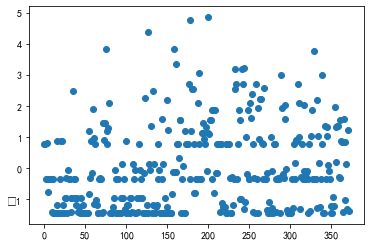

In [100]:
senti = (senti - np.mean(senti)) / np.std(senti)
rate = (rate - np.mean(rate)) / np.std(rate)
plt.scatter(range(len(rate-senti)),senti-rate)

In [101]:
lst_m = []
maxi = list(senti-rate)
maxi_sort = list(senti-rate)
maxi_sort.sort(reverse=True)
for i in maxi_sort[0:3]:
    lst_m.append(maxi.index(i))

In [102]:
for i in lst_m:
    review_dict['性价比'][i]    #评价不错
    jiagu.sentiment(review_dict['性价比'][i])
    dfe.score[i]

'奔驰没什么性价比。只是儿时的梦想。'

('positive', 0.9450205841178837)

"{'外观': '4', '内饰': '5', '空间': '5', '舒适': '4', '油耗': '3', '动力': '4', '操控': '4', '性价比': '2'}"

'42万能做很多事情。在我这个城市能买个小房子了。性价比这东西太抽象。你认为值就买。钱么。再赚呗。'

('positive', 0.8829159716270715)

"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '5', '动力': '5', '操控': '5', '性价比': '2'}"

'买这车最不该关注的就是性价比…我相信很多E260车主都不会在乎这个??'

('positive', 0.6267048367353727)

"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '4', '动力': '3', '操控': '4', '性价比': '2'}"

### power

In [130]:
lst = []
for i in dfe_review.score:
    try:
        lst.append(int(i[i.index('力')+5]))
    except Exception as e:
        lst.append('')
        print(e)

'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'
'float' object has no attribute 'index'


In [131]:
len(lst)
dfe_review['动力score'] = lst

1708

In [133]:
aspect = '[动力]'
lst = []
for i in range(0,470):
    if aspect in dfe_review.review[i]:
        lst.append(i)
review_list = []
for i in dfe_review.loc[lst,'review'].tolist():
    review = i.split('\n')
    index = review.index(aspect)
    review_list.append(review[index+1])
aspect = '动力：'
lst2 = []
for i in range(470,len(dfe_review)):
    if aspect in dfe_review.review[i]:
        lst2.append(i)
for i in dfe_review.loc[lst2,'review'].tolist():
    review = i.split('\n')
    index = review.index(aspect)
    review_list.append(review[index+1])
rate = dfe_review.loc[lst+lst2,'动力score']

In [134]:
senti =  []
aspect='动力'
total, count = 0, 0
text = review_dict[aspect]
for sentence in text:
    sentiment = jiagu.sentiment(sentence)
    sc = sentiment[1]
    if sentiment[0] == 'negative':
        sc = sentiment[1]*(-1)
    senti.append(sc)
senti

[-0.9999999958759835,
 0.9949982278222675,
 -0.999999931029158,
 -0.9858393947806174,
 -0.999966247719192,
 -0.9999999999691946,
 -0.9999998820637638,
 -0.999999931029158,
 0.9949982278222675,
 -0.9858393947806174,
 0.9949982278222675,
 -0.999999931029158,
 0.9949982278222675,
 0.9949982278222675,
 -0.999966247719192,
 -0.9996994239981701,
 0.9337750316082432,
 -0.99999946340138,
 -0.9999929891088917,
 -0.999966247719192,
 0.9337750316082432,
 -0.9999992550742629,
 0.9337750316082432,
 -0.9996994239981701,
 -0.9999992550742629,
 0.9569895891549797,
 -0.9858393947806174,
 0.9569895891549797,
 -0.999966247719192,
 -0.9858393947806174,
 -0.9999992550742629,
 -0.999966247719192,
 -0.9858393947806174,
 0.9569895891549797,
 0.9569895891549797,
 0.7825649421759637,
 -0.9899558528861593,
 -0.9999988522355283,
 0.9569895891549797,
 -0.9996994239981701,
 0.9569895891549797,
 -0.9858393947806174,
 -0.996099630414817,
 -0.9858393947806174,
 0.9569895891549797,
 -0.9966894380452743,
 -0.99999999999

In [135]:
senti = np.array(senti)
rate = np.array(rate)

In [136]:
len(rate)

1585

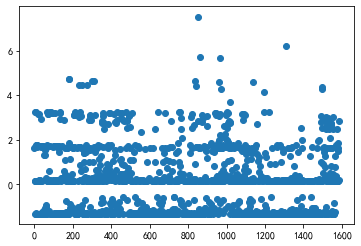

In [137]:
senti = (senti - np.mean(senti)) / np.std(senti)
rate = (rate - np.mean(rate)) / np.std(rate)
plt.scatter(range(len(rate-senti)),senti-rate)

In [138]:
lst_m = []
maxi = list(senti-rate)
maxi_sort = list(senti-rate)
maxi_sort.sort
for i in maxi_sort[0:5]:
    lst_m.append(maxi.index(i))
lst_m = set(lst_m)

<function list.sort(*, key=None, reverse=False)>

In [139]:
for i in lst_m:
    review_dict['动力'][i]    #评价不错
    jiagu.sentiment(review_dict['动力'][i])
    dfe.score[i]

'这就体现出了BBA三家不同的理念了，虽然账面数据比家里的老C6奥迪高，但是油门响应差很多，更别提和宝马比了，这车就是让你慢慢开的，坐驾驶位看见引擎盖的立标你就不想开快车了，哈哈。当然跑起来虽然比不了6缸机器，还是够用的。'

('negative', 0.9999999958759835)

"{'外观': '4', '内饰': '3', '空间': '4', '舒适': '4', '油耗': '3', '动力': '3', '操控': '4', '性价比': '3'}"

'2.0T低功率其实动力还不错，起步会稍感迟滞，但是提速的完全没问题，动力感觉源源不断，C模式感受不错，S和S+感受比价激进，比较给力，E模式的燃油经济性最好。'

('positive', 0.9949982278222675)

"{'外观': '5', '内饰': '5', '空间': '4', '舒适': '4', '油耗': '4', '动力': '4', '操控': '4', '性价比': '3'}"

'动力一般，奔驰整体调教就是这调性。你要动力也有，超车没问题，底气也足。但就是让你没什么驾驶欲望，也不会勾引你给油门开快车。所以主观感受就是动力一般。R400比525跑的要快，但是开起来的主观感受没有5系快。奥迪和奔驰同样8秒多的车，就是感觉开着比奔驰更冲一点。'

('negative', 0.999999931029158)

"{'外观': '3', '内饰': '5', '空间': '4', '舒适': '4', '油耗': '4', '动力': '4', '操控': '3', '性价比': '4'}"

'一般，C模式，E模式起步感觉很肉。司机表示前段加速实在是二厂的酱货---肉枣一枚，中后段开起来如丝般顺滑，如同鱼儿在水里游，如同动力伞在天上滑行。'

('negative', 0.9858393947806174)

"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '4', '动力': '3', '操控': '3', '性价比': '3'}"

'E200L和E300L都试驾过，都搭载了2.0T的发动机，虽然有高低调教之分，但是在试驾的时候，感觉不是特别明显，另外，油门感受，舒适模式油门有点迟缓，运动模式就很舒服，运动+模式，油耗偏高，所以因人而异，而且深踩油门涡轮介入有点突然，推背感足够强悍'

('negative', 0.999966247719192)

"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '4', '动力': '4', '操控': '4', '性价比': '4'}"